### Customer Segmentation analysis
### Overview:
- During the Analysis Approach phase, using Python and Google Colab, I explored and cleaned the data in the "Transactions" sheet.

- By examining and processing missing values, null values, duplicates, and data inconsistency, I created the correct data set and prepared it for the next steps of analysis in the Customer Segmentation Analysis project.



### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# Loading the Transaction Data from the excel file
transaction = pd.read_excel('Raw_data.xlsx' , sheet_name='Transactions')

In [3]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
# Information of columns and data-types of Transaction Data.
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The data type of the column **product_first_sold_date** is not correct; the data type will be adjusted to **DateTime**.

In [5]:
transaction['product_first_sold_date'] = pd.to_datetime(transaction['product_first_sold_date'], unit='s')
transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56


In [6]:
print("Total records (rows) in the dataset : {}".format(transaction.shape[0]))
print("Total columns (features) in the dataset : {}".format(transaction.shape[1]))

Total records (rows) in the dataset : 20000
Total columns (features) in the dataset : 13


### Numeric Columns and Non-Numeric Columns

In [7]:
# select numeric columns
df_numeric = transaction.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = transaction.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost']
The non-numeric columns are : ['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size' 'product_first_sold_date']


### Missing Values Check

#### Overview about missing values

In [8]:
# Total number of missing values
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

The amount of data missing in columns **'brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'** is the same (197 samples), which could suggest a relationship between these columns. Meanwhile, the **'online_order'** column has the most missing values (360 samples). Begin checking and cleaning the data to continue building the RFM model.

#### 1: online_order

In [9]:
transaction[transaction['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 10:30:23
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,1970-01-01 10:41:22
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:30:38
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,1970-01-01 11:42:25
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 09:50:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,1970-01-01 11:29:05
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 11:24:24
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,1970-01-01 10:33:22


In [10]:
transaction['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [11]:
most_frequency_online_order = transaction['online_order'].mode()
most_frequency_online_order

0    1.0
Name: online_order, dtype: float64

Sử dung mode() function để có thể tìm ra giá trị chiếm phần lớn của giá trị xuất hiện thường xuyên là *'1.0'*. Và cũng có thể thấy số lượng giá trị này lớn hơn.

In [12]:
transaction['online_order'].fillna(1, inplace = True)

In [13]:
transaction['online_order'].isnull().sum()

0

#### 2: 'brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'

In [14]:
missing_values = transaction[['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']].isnull().sum()

# Calculate the total number of missing values across the entire DataFrame
total_missing = missing_values.sum()
# Calculate the percentage of missing values across the entire DataFrame
percentage_missing = (total_missing / transaction.size) * 100

In [15]:
# Print the result
print("Total number of missing values:", total_missing)
print("Percentage of missing values (%):", percentage_missing)

Total number of missing values: 1182
Percentage of missing values (%): 0.45461538461538464


In [16]:
# Check a data sample if the 'brand' column is missing, the rest of the columns will also be missing
sample_missing_brand = transaction[transaction['brand'].isnull()]
print("The data form with column 'brand' is lost and the rest of the columns are also lost:")
print(sample_missing_brand)

# Check a data sample if the column 'brand' has a value, the rest of the columns will also have a value
sample_non_missing_brand = transaction[transaction['brand'].notnull()]
print("Data sample has column 'brand' with value and the rest of columns also have value:")
print(sample_non_missing_brand)

The data form with column 'brand' is lost and the rest of the columns are also lost:
       transaction_id  product_id  customer_id transaction_date  online_order  \
136               137           0          431       2017-09-23           0.0   
159               160           0         3300       2017-08-27           0.0   
366               367           0         1614       2017-03-10           0.0   
406               407           0         2559       2017-06-14           1.0   
676               677           0         2609       2017-07-02           0.0   
...               ...         ...          ...              ...           ...   
19340           19341           0          443       2017-12-26           1.0   
19383           19384           0         2407       2017-06-11           0.0   
19793           19794           0         2860       2017-01-13           0.0   
19859           19860           0         2468       2017-06-24           1.0   
19871           19872   

In [17]:
# Remove data samples where column 'brand' is missing, remove samples with missing values in any column
df_transaction = transaction.dropna(subset=['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'])

# Print the number of data samples after removal
print("Number of data samples after removal:", len(df_transaction))

# Sample rate rejected
percentage_removed = (len(transaction) - len(df_transaction)) / len(transaction) * 100
print("Removed sample rate (%):", percentage_removed)


Number of data samples after removal: 19803
Removed sample rate (%): 0.985


In [18]:
df_transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [19]:
# Create column 'profit' based on 'list_price' minus for 'standard_cost'
df_transaction['profit'] = df_transaction['list_price'] - df_transaction['standard_cost']

# Print first few lines of DataFrame after adding column 'profit'
df_transaction.head()

<ipython-input-19-9c4751fa4716>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction['profit'] = df_transaction['list_price'] - df_transaction['standard_cost']


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82


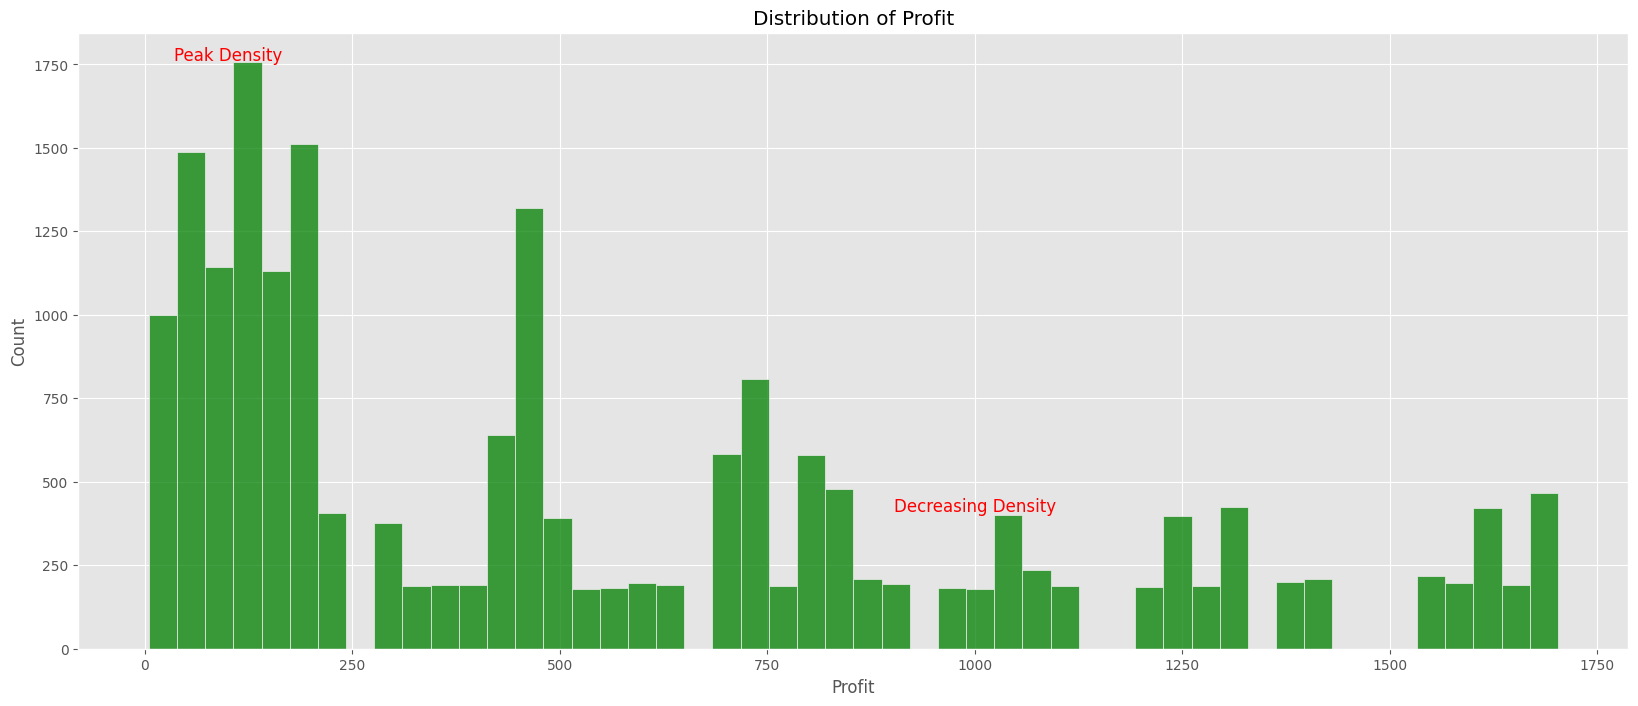

In [20]:
# Generate histogram to show profit distribution
plt.figure(figsize=(20, 8))
sns.histplot(df_transaction['profit'], color='green', bins=50)

# Create a line plot to show the density of the profit distribution
sns.lineplot(x=df_transaction['profit'], y=df_transaction['profit'].value_counts(normalize=True), color='red', lw=2)

plt.xlabel('Profit')
plt.title('Distribution of Profit')
# Add notes on important points
plt.text(100, 1750, 'Peak Density', fontsize=12, ha='center', va='bottom', color='red')
plt.text(1000, 400, 'Decreasing Density', fontsize=12, ha='center', va='bottom', color='red')

plt.xlabel('Profit')
plt.title('Distribution of Profit')
plt.show()

In the above code, we have used sns.lineplot() to create a line plot and display the density of the profit distribution for each range of values. We use value_counts(normalize=True) to calculate the thickness ratio of each return value. This will help to display a line graph corresponding to the data distribution.

This way helps you see the concentration of profits in the range of values from 0 to 500 and gradually decreases for profits from 2000 onwards. Captions can be added to key points on the chart using plt.text()

- Improved chart with additional key point annotations. The first point of interest has coordinates x=100 and y=1750, and the second point of interest has coordinates x=1000 and y=400.
- This will help emphasize the point of maximum thickness (peak) and end of diminishing density (decreasing density) on the chart.

### Exporting to CSV

In [21]:
# Save the cleaned DataFrame to a csv file
df_transaction.to_csv('Transaction_Clean.csv', index=False)